# Importing required libraries for the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data preparation and understanding in the following section

In [2]:
df_listing=pd.read_csv("./listings.csv")
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [3]:
df_listing.shape

(3585, 95)

In [4]:
df_listing.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   756
Length: 95, dtype: int64

### We are dropping those columns which more than 90% of missing data

In [5]:
most_missing_cols=[]
sr=100 * df_listing.isnull().sum() / len(df_listing)
sr=sr.to_dict()
for key in sr:
    if sr[key] > 90:
        most_missing_cols.append(key)
print(most_missing_cols)

['neighbourhood_group_cleansed', 'square_feet', 'has_availability', 'license', 'jurisdiction_names']


In [6]:
df_listing=df_listing.drop(most_missing_cols,axis=1)
df_listing.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   756
Length: 90, dtype: int64

### Converting the price related columns into a float type

In [7]:
def price_convertor(df,colname):
    """ Here,
        df: stands for the datafram which is to be converted.
        colname: the name of the column, which is need to be cleansed.
        """
    df[colname]=df[colname].str.replace('$', '').str.replace(',', '')
    df[colname]=df[colname].astype(float)
    return df[colname]

In [8]:
df_listing["price"]=price_convertor(df_listing,"price")
df_listing["price"]

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64

In [9]:
df_listing["weekly_price"]=price_convertor(df_listing,"weekly_price")
df_listing["monthly_price"]=price_convertor(df_listing,"monthly_price")
df_listing["security_deposit"]=price_convertor(df_listing,"security_deposit")
df_listing["cleaning_fee"]=price_convertor(df_listing,"cleaning_fee")
df_listing["extra_people"]=price_convertor(df_listing,"extra_people")

In [10]:
df_listing[["price","weekly_price","monthly_price","security_deposit","cleaning_fee","extra_people"]].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,250.0,NaN,NaN,NaN,35.0,0.0
1,65.0,400.0,NaN,95.0,10.0,0.0
2,65.0,395.0,1350.0,NaN,NaN,20.0
3,75.0,NaN,NaN,100.0,50.0,25.0
4,79.0,NaN,NaN,NaN,15.0,0.0


In [11]:
df_listing[["price","weekly_price","monthly_price","security_deposit",
            "cleaning_fee","extra_people"]].isnull().sum()/len(df_listing)

price               0.000000
weekly_price        0.751185
monthly_price       0.752301
security_deposit    0.625662
cleaning_fee        0.308787
extra_people        0.000000
dtype: float64

#### There is lot of missing data primarily in the columns weekly_price and monthly_price, and the columns price and extra_people   has no missing values.

### Now we will be dropping columns with the url extension, because it doesn't add any information to our analysis.

In [12]:
def drop_url(df):
    # df is the dataframe
    list1=list(df.columns)
    list_url=[]
    for i in list1:
        if 'url' in i:
            list_url.append(i)
    return list_url

In [13]:
url_cols=drop_url(df_listing)
url_cols

['listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url']

In [14]:
df_listing=df_listing.drop(url_cols,axis=1)
df_listing.shape

(3585, 82)

#  Business understanding section.

## We primarily be answering four business questions, which are stated as follows,
- _What areas of Boston has the most and the least number of listings_ ?
- _What areas of Boston are the costliest areas to stay_ ?
- _What sets apart a super host from a normal host_ ?
- _How the number of booked listing varies in the time of the year_ ?

The importance of the first two questions is mainly for the person who is going to visit Boston, and want to know where in Boston the Airbnb listings are high, and which neighborhood fits to their budget. The last two questions primarily concerns for host who wants to transform from normal host to super host, and what to know what time of the year does Airbnb bookings increases, so that he/she can prep up his business.
#### Note : ***For answering the above four questions we will be primarily be using inferential statistics, therefore Data Modelling and Evaluation of results sections of the CRISP-DM procedure is not covered in this notebook***

### Now we will be addressing the first question in the above of list of questions.

In [15]:
stat_neigh=df_listing.groupby(["neighbourhood"]).agg({"neighbourhood":"count"})
stat_neigh.columns=["neigh_count"]
stat_neigh=stat_neigh.sort_values(ascending=False,by="neigh_count")
stat_neigh=stat_neigh.reset_index()
stat_neigh.head()

,neighbourhood,neigh_count
0,Allston-Brighton,364
1,Jamaica Plain,314
2,South End,298
3,Back Bay,291
4,Fenway/Kenmore,249


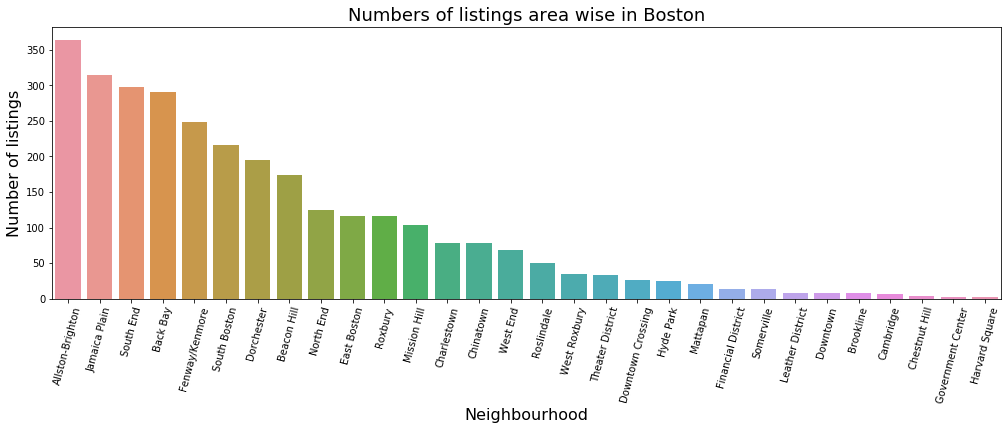

In [16]:
#((stat_neigh*100)/df_listing.shape[0]).plot(kind="bar",color=['black', 'red', 'green', 'blue', 'cyan']);

plt.figure(figsize = (17,5))
ax = sns.barplot(x="neighbourhood", y="neigh_count", data=stat_neigh)
plt.xlabel("Neighbourhood", fontsize= 16)
plt.ylabel("Number of listings", fontsize= 16)
plt.title("Numbers of listings area wise in Boston", fontsize=18)
plt.xticks(rotation=75)
plt.savefig('plot.png', dpi=400, bbox_inches='tight')

## Now we will addressing the second question in the list of question
- _What areas of Boston are the costliest areas to stay_ ?

In [17]:
stats_avg_price=df_listing.groupby(by="neighbourhood").agg({"price":["mean","max","min"]})
stats_avg_price.columns=["avg_price","max_price","min_price"]
stats_avg_price=stats_avg_price.sort_values(ascending=False,by="avg_price")
stats_avg_price=stats_avg_price.reset_index()
stats_avg_price.head()

,neighbourhood,avg_price,max_price,min_price
0,Harvard Square,359.000000,459.0,259.0
1,Financial District,283.692308,400.0,100.0
2,Downtown Crossing,273.500000,449.0,95.0
3,Leather District,245.875000,400.0,139.0
4,Back Bay,245.457045,1250.0,40.0


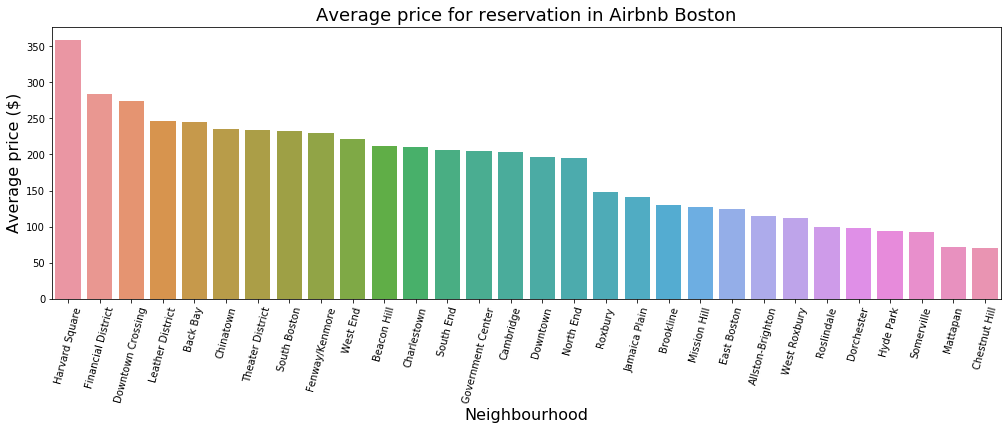

In [18]:
plt.figure(figsize = (17,5))
ax = sns.barplot(x="neighbourhood", y="avg_price", data=stats_avg_price)
plt.xlabel("Neighbourhood", fontsize= 16)
plt.ylabel("Average price ($)", fontsize= 16)
plt.title("Average price for reservation in Airbnb Boston", fontsize=18)
plt.xticks(rotation=75)
plt.savefig('avg_price_areawise.png', dpi=400, bbox_inches='tight')

In [19]:
from keplergl import KeplerGl
map_1 = KeplerGl(height=500)
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=500)

In [20]:
map_boston=df_listing.groupby(["neighbourhood","latitude","longitude",]).agg({"neighbourhood":"count"})
map_boston.columns=["neighbor_count"]
map_boston=map_boston.reset_index()
map_boston.head()

,neighbourhood,latitude,longitude,neighbor_count
0,Allston-Brighton,42.335887,-71.148954,1
1,Allston-Brighton,42.336894,-71.150790,1
2,Allston-Brighton,42.336898,-71.150180,1
3,Allston-Brighton,42.337170,-71.149654,1
4,Allston-Brighton,42.337190,-71.151437,1


In [21]:
map_1.add_data(data = map_boston, name='map_boston')
map_1.save_to_html(file_name='first_map.html')

Map saved to first_map.html!


## Now we address the third question
- _What sets apart a super host from a normal host_ ?

In [22]:
df_listing["host_is_superhost"].isnull().sum()

0

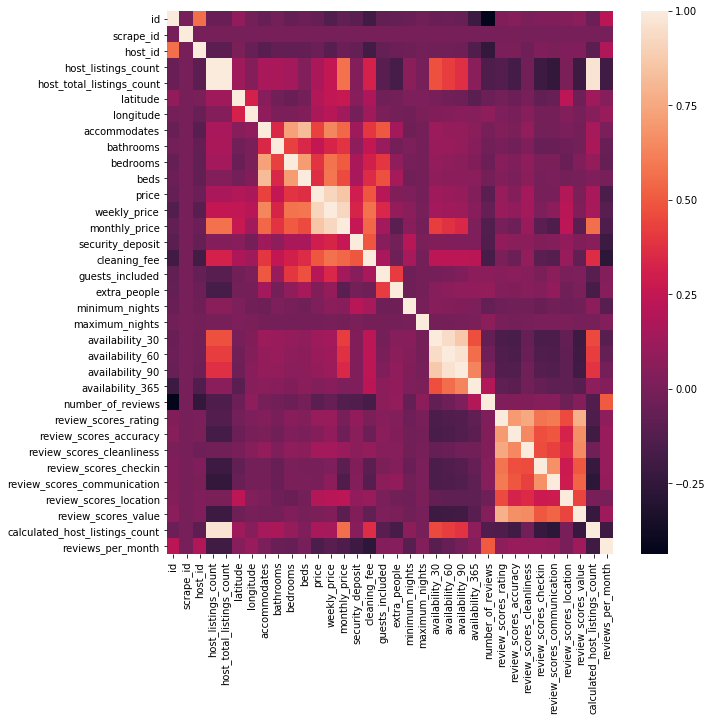

In [23]:
plt.figure(figsize = (10,10))
sns.heatmap(df_listing.corr())

#### It is hard to make correleation between two different variables, because there are lot of variables in it

In [24]:
df_listing.groupby(by="host_is_superhost").mean()["price"]

host_is_superhost
f    173.604468
t    176.434889
Name: price, dtype: float64

In [25]:
is_superhost=df_listing[df_listing["host_is_superhost"]=='t']
is_superhost=is_superhost.reset_index()
not_superhost=df_listing[df_listing["host_is_superhost"]=='f']
not_superhost=not_superhost.reset_index()

#### converting host_response_rate into float type

In [26]:
not_superhost["host_response_rate"]=not_superhost["host_response_rate"].str.replace('%','').astype(float)
not_superhost["host_response_rate"].isnull().sum()/len(not_superhost)

0.14663310258023915

In [27]:
is_superhost["host_response_rate"]=is_superhost["host_response_rate"].str.replace('%','').astype(float)
is_superhost["host_response_rate"].isnull().sum()/len(is_superhost)

0.012285012285012284

In [28]:
x=is_superhost["host_response_rate"].min()
print("minimun of response rate of super host is ",x)
x=not_superhost["host_response_rate"].min()
print("minimun of response rate of normal host is ",x)
del x

minimun of response rate of super host is  70.0
minimun of response rate of normal host is  0.0


In [29]:
x=not_superhost.groupby(["host_response_rate"]).agg({"host_response_rate":"count"})
x.columns=["response_count"]
x=x.reset_index()
x.head()

,host_response_rate,response_count
0,0.0,13
1,6.0,1
2,10.0,2
3,14.0,2
4,17.0,1


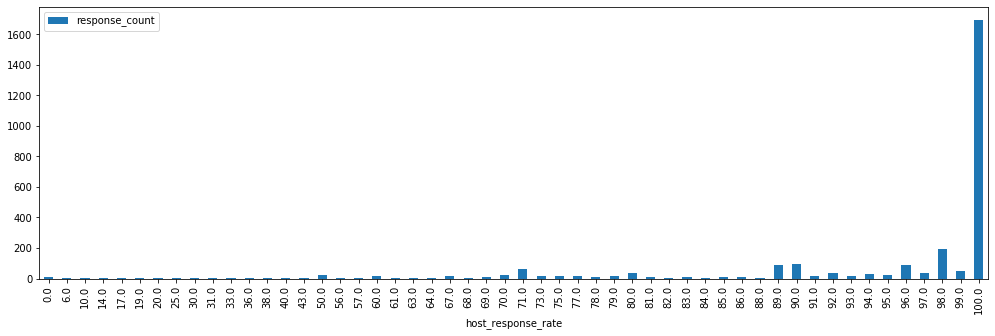

In [30]:
ax2 = x.plot(x='host_response_rate',
                      y='response_count',kind='bar',rot=90,figsize=(17,5))
del x

### From the above analysis we understood that both super host and normal host repsonse rate is a left skewed graph, therefore for filling the missing values for the skewed distribution of host response rate the median is the proper imputing method, and more details regarding this fact can be found [here](https://statisticsbyjim.com/basics/measures-central-tendency-mean-median-mode/)

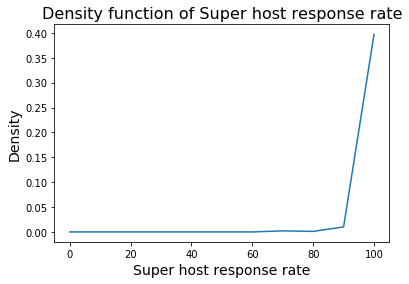

In [31]:
is_superhost["host_response_rate"].fillna((is_superhost[["host_response_rate"]].median()), inplace=True)
x=is_superhost["host_response_rate"]
ax=x.plot.kde(ind=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel("Super host response rate", fontsize= 14)
plt.ylabel("Density", fontsize= 14)
plt.title("Density function of Super host response rate", fontsize=16)
plt.savefig('Density_superhost.png', dpi=400, bbox_inches='tight')
del x

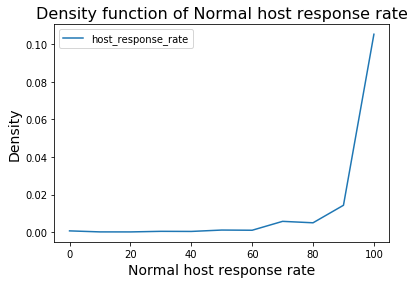

In [32]:
not_superhost["host_response_rate"].fillna((not_superhost[["host_response_rate"]].median()), inplace=True)
x=not_superhost[["host_response_rate"]]
ax=x.plot.kde(ind=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel("Normal host response rate", fontsize= 14)
plt.ylabel("Density", fontsize= 14)
plt.title("Density function of Normal host response rate", fontsize=16)
plt.savefig('Density_normalhost.png', dpi=400, bbox_inches='tight')
del x;

#### The above results show that is response rate is high for superhost

### Now we are goin through the reviews comparision between host and superhost

In [33]:
is_superhost[["review_scores_rating","review_scores_cleanliness",
                           "review_scores_checkin","review_scores_communication","review_scores_location",
                          "review_scores_value"]].isnull().sum()/len(is_superhost)

review_scores_rating           0.031941
review_scores_cleanliness      0.031941
review_scores_checkin          0.031941
review_scores_communication    0.031941
review_scores_location         0.031941
review_scores_value            0.031941
dtype: float64

In [34]:
not_superhost[["review_scores_rating","review_scores_cleanliness",
                           "review_scores_checkin","review_scores_communication","review_scores_location",
                          "review_scores_value"]].isnull().sum()/len(not_superhost)

review_scores_rating           0.251731
review_scores_cleanliness      0.253304
review_scores_checkin          0.253933
review_scores_communication    0.253304
review_scores_location         0.254563
review_scores_value            0.254248
dtype: float64

In [ ]:
plt.figure(figsize = (7,7))
ax=sns.heatmap(is_superhost[["review_scores_rating","review_scores_cleanliness",
                           "review_scores_checkin","review_scores_communication","review_scores_location",
                          "review_scores_value"]].corr(),annot=True)
plt.title("Super host", fontsize=16)
plt.savefig('Correleation_map_superhost.png', dpi=400, bbox_inches='tight')

In [ ]:
plt.figure(figsize = (7,7))
sns.heatmap(not_superhost[["review_scores_rating","review_scores_cleanliness",
                           "review_scores_checkin","review_scores_communication","review_scores_location",
                          "review_scores_value"]].corr(),annot=True)
plt.title("Normal host", fontsize=16)
plt.savefig('Correleation_map_normalhost.png', dpi=400, bbox_inches='tight')

#### From the above correleation maps we come to know that review_scores_rating has higher correleation review_score_cleanliness, particularly in the case non-superhost
### Now we are goin through the pricing comparision between host and superhost

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(is_superhost[["price","security_deposit","cleaning_fee","extra_people"]].corr(),
            annot=True)
plt.title("Superhost", fontsize=16)
plt.savefig('Correleation_map_price_superhost.png', dpi=400, bbox_inches='tight')

In [ ]:
is_superhost[["price","security_deposit","cleaning_fee","extra_people"]].mean()

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(not_superhost[["price","security_deposit","cleaning_fee","extra_people"]].corr(),
            annot=True)
plt.title("Normal host", fontsize=16)
plt.savefig('Correleation_map_price_normal.png', dpi=400, bbox_inches='tight')

In [ ]:
not_superhost[["price","security_deposit","cleaning_fee","extra_people"]].mean()

In [ ]:
x = is_superhost[["review_scores_cleanliness",
                           "review_scores_checkin","review_scores_communication","review_scores_location",
                          "review_scores_value"]].mean()
x.name="average"
print(x)
ax=x.plot(kind='bar')
plt.ylabel("Average rating",fontsize=16)
plt.ylim(9.5, 10)
plt.title("Super host",fontsize=18)
plt.savefig('Average_rating_super_host.png', dpi=400, bbox_inches='tight')

In [ ]:
x = not_superhost[["review_scores_cleanliness",
                           "review_scores_checkin","review_scores_communication","review_scores_location",
                          "review_scores_value"]].mean()
x.name="average"
print(x)
ax=x.plot(kind='bar')
plt.ylabel("Average rating",fontsize=16)
plt.ylim(9, 10)
plt.title("Normal host",fontsize=18)
plt.savefig('Average_rating_normal_host.png', dpi=400, bbox_inches='tight')

## Finally, we delve into our last question,
- _What time of the year people usually vists Boston, USA_ ?

In [ ]:
df_calendar=pd.read_csv("./calendar.csv",parse_dates=["date"])
print(df_calendar.date.dtype)
df_calendar.head()

In [ ]:
df_calendar=df_calendar.drop(["price"],axis=1)
df_calendar.head()

In [ ]:
df_calendar=df_calendar.groupby(["date","available"]).agg({"available":"count"})
df_calendar.columns=["avail_count"]
df_calendar=df_calendar.reset_index()
print(df_calendar.head())
# Here we are only considering the reserved (booked) rooms
df_calendar=df_calendar[df_calendar["available"]=="f"]
df_calendar.head()

In [ ]:
df_calendar.isnull().sum()

In [ ]:
plt.figure(figsize = (17,5))

plt.plot_date(x=df_calendar["date"], y=df_calendar["avail_count"], fmt="r-")
plt.title("Time versus number of booked rooms")
plt.ylabel("Number of booked rooms")
plt.xlabel("Time series")
plt.grid(True)
plt.savefig('Date_booked_rooms.png', dpi=400, bbox_inches='tight')
plt.show()

#### The analysis of the above graph is given in more detail in my Medium post